In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

import seaborn as sns
plt.style.use('seaborn-darkgrid')

import glob
from matplotlib import rcParams, rc

# rcParams['font.family'] = 'sans-serif'
# rc('font',**{'family':'serif','serif':['Times']})


In [57]:
data = {
    'actively_learned_koopman' : {20 : [], 30 : [], 40 : []},
    'stable_koopman' : {20 : [], 30 : [], 40 : []}
}
for fpath in glob.glob('data/*.pkl'):
    _data = pkl.load(open(fpath, 'rb'))
    data[_data['kind']][_data['T']].append(_data['err'])

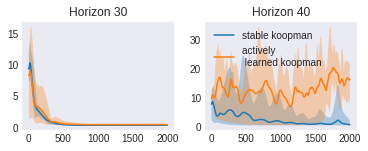

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(6,2))

for i, T in enumerate([30,40]):
    mean = np.mean(data['stable_koopman'][T], axis=0)
    ax[i].plot(mean, label='stable koopman')
    x = [i for i in range(2000)]
    ax[i].fill_between(
        x, 
        np.min(data['stable_koopman'][T], axis=0),
        np.max(data['stable_koopman'][T], axis=0), alpha=0.3
    )
    mean = np.mean(data['actively_learned_koopman'][T], axis=0)
    ax[i].plot(mean, label='actively \n learned koopman')
    ax[i].fill_between(
        x, 
        np.min(data['actively_learned_koopman'][T], axis=0),
        np.max(data['actively_learned_koopman'][T], axis=0), alpha=0.3
    )
    ax[i].grid(False)
    
#     ax[i].set_ylim(0.2, 20)
    ax[i].set_title('Horizon ' + str(T))
ax[1].legend()

plt.show()